<a href="https://colab.research.google.com/github/gustavods07/Credit-Risk-Data-Analysis/blob/master/credit_risk_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRIRIES:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

**APPLIED DATASET:** https://www.kaggle.com/laotse/credit-risk-dataset

**READING THE .CSV FILE AND DISPLAYING THE DATA DISPOSITION:**

In [ ]:
data = pd.read_csv('/content/sample_data/credit_risk_dataset.csv')
data ## displays the data disposition

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**COUNTING THE UNIQUE VALUES OF A COLUMN (IN THIS CASE, THE 'person_age' COLUMN) FROM A FILTERED AMOUNT OF DATA:**




In [ ]:
loan_people = np.unique(data['loan_status'], return_counts = True) ## it is possible to comprehend how much people of this dataset are or aren't in debts
default = data[data['loan_status'] == 1] ## here the data is filtered to group only the data from people with debts (loan_status = 1) into the default variable
age_diversity = np.unique(default['person_age']) ## it is possible to understand how diverse is this dataset in terms of age
print(loan_people)
print(age_diversity)

(array([0, 1]), array([25473,  7108]))
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 70]


**PLOTING THE OBTAINED DATA FROM THE PREVIOUS COMMAND INTO GRAPHS:**

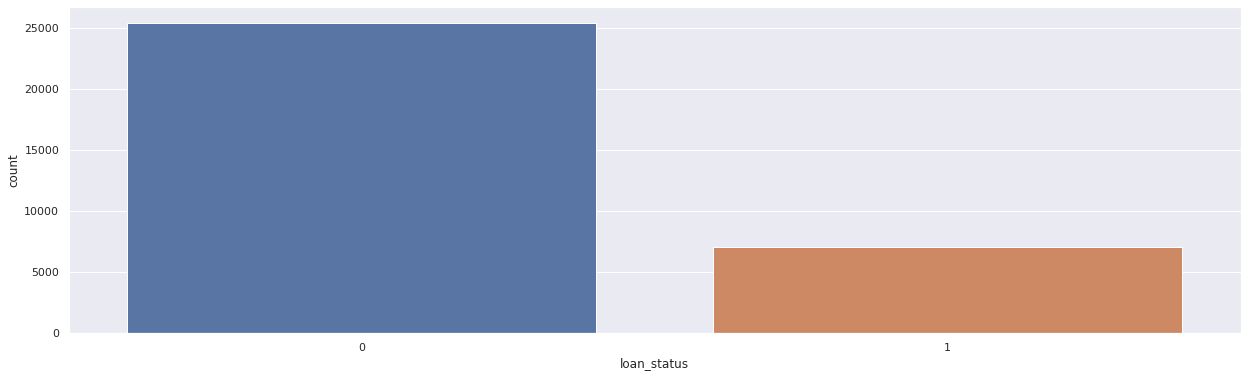

In [ ]:
sns.countplot(x = data['loan_status']);
## it is possible to comprehend the loan status disposition of the people monitored in this dataset
## 0 = without debts, 1 = in debts

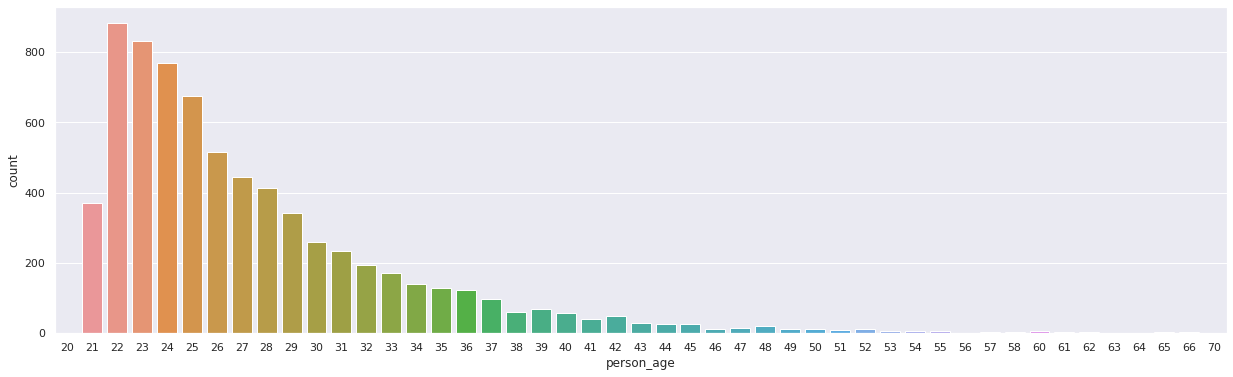

In [ ]:
sns.set(rc = {'figure.figsize':(21,6)}) ## changes the plot dimensions to display correctly the parameters
sns.countplot(x = default['person_age']); ## shows how much people have the documented ages
## it is possible to comprehend the age disposition of the people monitored in this dataset

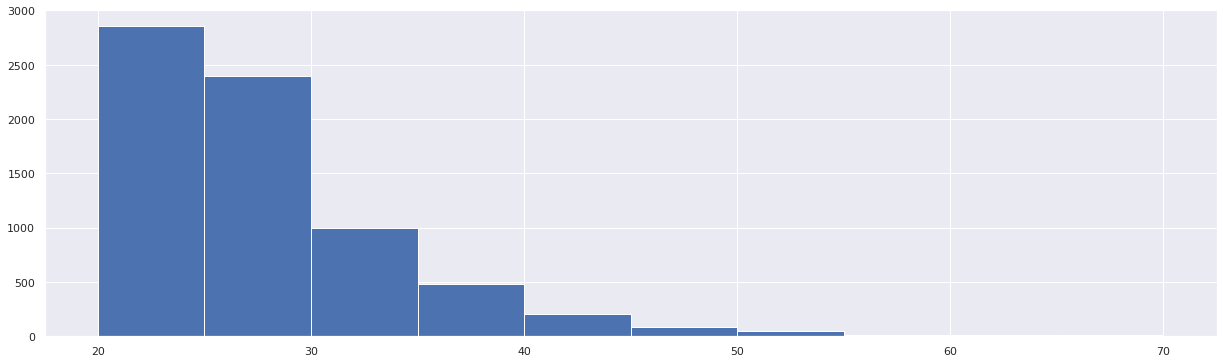

In [ ]:
plt.hist(x = default['person_age']); 
## shows the distribuition of the people in debts in age intervals (using a histogram)
## it's important to say that the values at the bottom represent the age and the values at the right size represent the number of people
## since the number of people with more than 60 years is low, the values cannot be observed in this plot

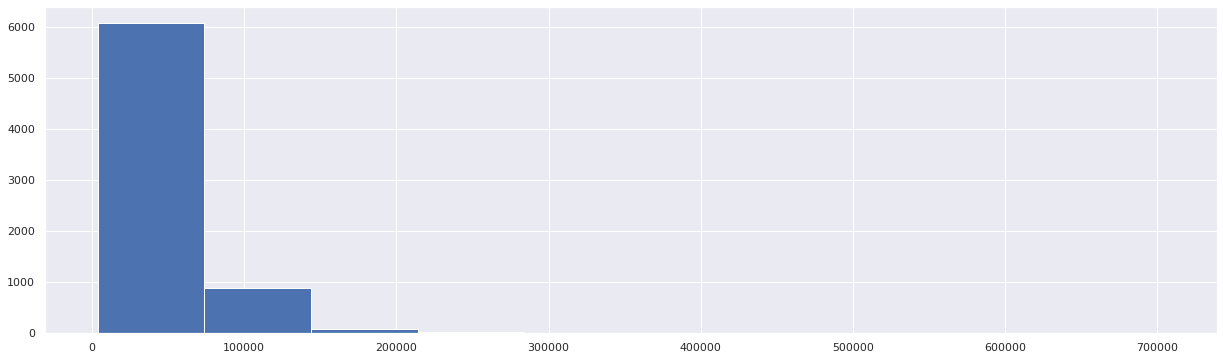

In [ ]:
plt.hist(x = default['person_income']);
## shows the distribuition of the people in debts in income intervals (using a histogram)


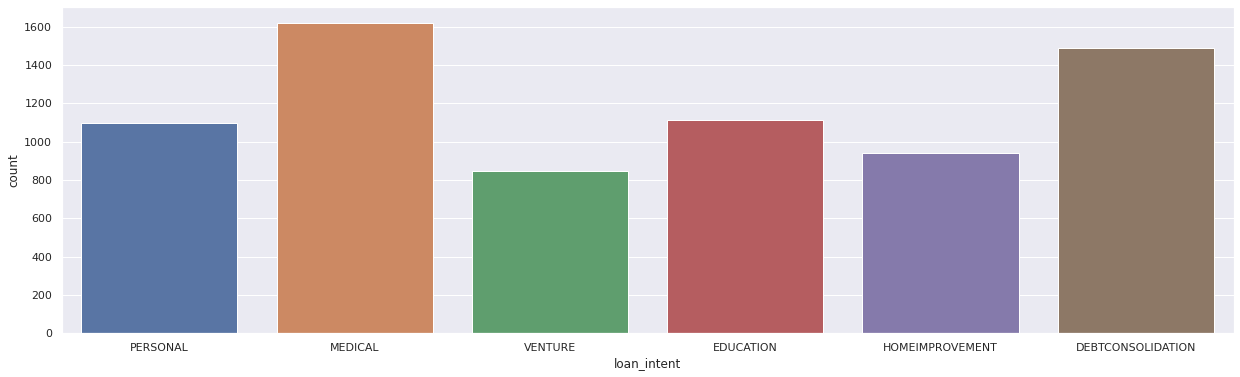

In [ ]:
sns.countplot(x = default['loan_intent']);
## shows the distribuition of loan intent between people in debts


**PARTIAL CONCLUSIONS 1:**
* At this moment is possible comprehend that young people are 
substentialy more in debts than older people.
* It is also possible to understand that the proportion of people with debts per people without debts is $7108/25473$.
* The 4th graph shows how people in debts usually have lower incomes.
* The 5th graph shows that Medical and Debit Consolidation loans are the most commom debts.


**FILTERING AND CLUSTERING DATA**:

In [ ]:
higher_income = default[default['person_income']>= 10000 ] ## people in debts with income higher than 99999
lower_income = default[default['person_income']< 10000 ] ## people in debts with lower higher than 10000

**GRAPHS BASED IN THESE TWO CLUSTERED PARAMETERS:**

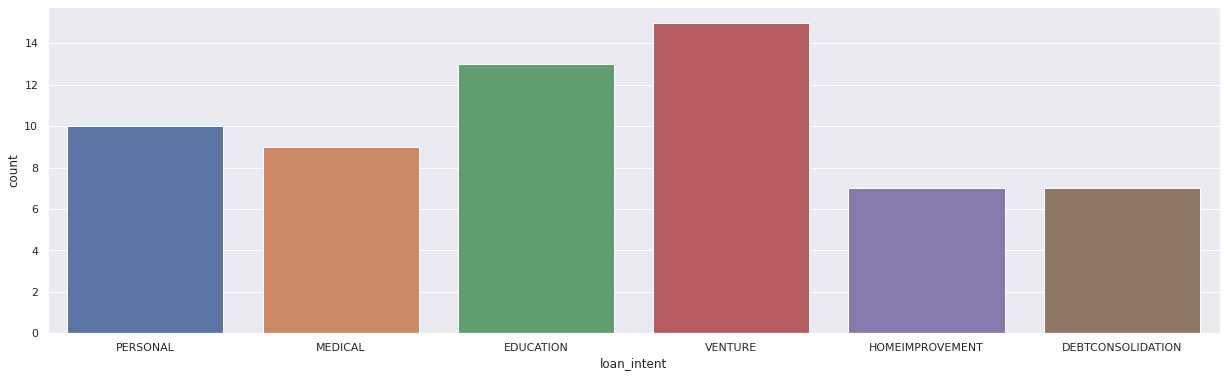

In [ ]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = lower_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income higher than 9999

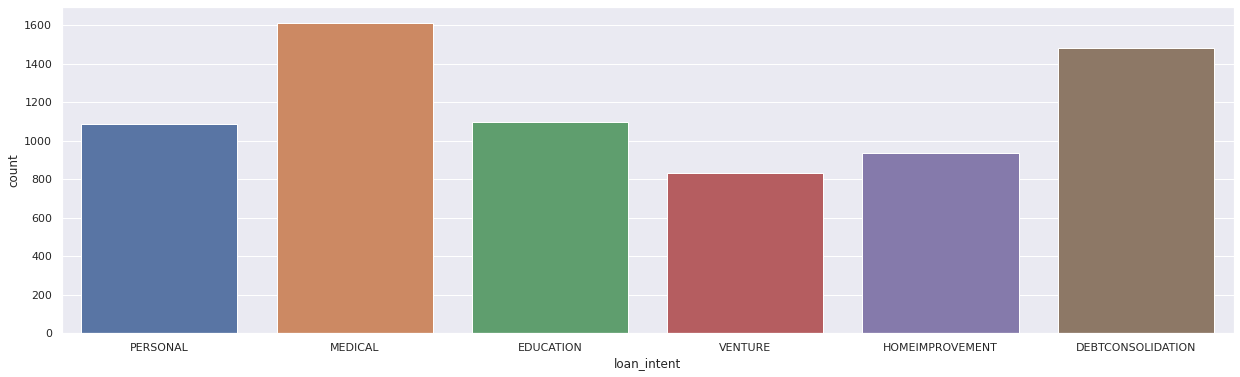

In [ ]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = higher_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income lower than 10000

**GRAPHS WITH COMBINATED PARAMETERS FROM DATASET:**


In [ ]:
px.scatter_matrix(default,['person_income','person_age','loan_amnt'])

## it is also possible to analyze several parameters with a matrix of scatter graphs

**PARTIAL CONCLUSIONS 2:**
* Now is possible to understand that people with lower income  and debts usually use more the loans to pay for venture and education purposes.
* Although, people with higher income and debts use more the loans to pay for medical and debt consolidation purposes.
* At a first look it is acceptable to think that, to people with lower income, loans destined to venture and education purposes are more risky. For people with higher income, loans destined to medical and debt consolidation purposes are more risky.


**MEAN VALUES OF SELECTED PARAMETERS IN A CHOSEN INTERVAL:**

In [ ]:
from numpy.core.fromnumeric import mean
mean_debt = default['loan_amnt'][default['person_age']> 25][default['person_age']< 40].mean()
## filtering the data and obtaining the mean amount in debt of people between 26 and 39 years old.]
print(mean_debt) 

11262.934000625586


**FINDING INCONSISTENCIES:**

In [ ]:
## This dataset apparently have some strange ages for some people: ages hugher than 100 years old
## we can use mechanisms to treat eventual inconsistencies with data filtering and treatment

data.loc[data['person_age']>100] ## here is possible to localize all people with loan amount higher than 20.000 and see how much errors we have
## now, we can choose to crate a new variable without registered ages higher than 100 years old:
no_errors = data.drop(data[data['person_age']>100].index)

## here we can see how much data were erased from the dataset
print(len(data),len(no_errors))
## now it is possible to understand that, from 32581 registered people, 5 are possibly wrong



32581 32576


**TREATING DATA INCONSISTENCIES:**

In [ ]:
## since we have only 5 registers possibly wrong, and the untrusted parameter is age, changing the untrusted values for the mean could be worth
## so, we should obtain the mean without consider the wrong values:
mean_age = no_errors['person_age'].mean()
## now we should change the 5 values for this mean:
data.loc[data['person_age']>100] = mean_age
## Now all untrusted values were turned into the mean and can be computed to a machine learning trusted process

**PREDICTIVE ATTRIBUTES:**

* Since unique parameters doesn't fit as predictive attributes, i am choosing three specific parameters: **person_age** , **person_income** and **loan_amnt**

**CHECKING POSSIBLE REMAINING DATA INCONSISTENCES BETWEEN THE PREDICTIVE ATTRIBUTES - OBTAINING THE LOWER AND HIGHER VALUES OF THE SELECTED ATRIBUTES (person_age, person_income, loan_amnt) CONSIDERING ALL THE ROWS:**


In [ ]:
data['person_age'].min() ## youngest person's age

20.0

In [ ]:
data['person_age'].max() ## oldest person's age

94.0

In [ ]:
data['person_income'].min() ## lowest income

27.718043958742633

In [ ]:
data['person_income'].max() ## highest income


2039784.0

In [ ]:
data['loan_amnt'].min() ## lowest loan

27.718043958742633

In [ ]:
data['loan_amnt'].max() ## highest loan

35000.0


**PARTIAL CONCLUSIONS 3:**

* $27.718043958742633 represents a too low income, so it is important to search for equal income value registers as possible inconsistencies;
* 27.718043958742633 seems to be a commom entrance, suggesting a registered error.

**CHECKING THE INDEXES WITH THE UNCOMMON REPEATED VALUE:**

In [ ]:
data[data['person_income'] < 28]
## YES WE DO HAVE REMAINING INCONSISTENCIES

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044
183,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044
575,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044
747,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044
32297,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044,27.718044


**PARTIAL CONCLUSIONS 4:**

* since all the values on the 5 wrongly registered records are just repeating the same value, we cannot use the data, since it would be necessary changing all the predictive values to mean values;
* it should be better erase these specific rows;

**ERASING THE INCONSISTENT ROWS:**

In [ ]:
data = data.drop(data[data['person_income']<28].index)
## checking for the inconsistent rows 
data['loan_status'][data['loan_status']>1]
##they were deleted

Series([], Name: loan_status, dtype: float64)

**CREATING NUMPY ARRAYS FOR PREDICTIVE ATTRIBUTES AND EXPECTED RESULTS:**

In [ ]:
## The first step to use predictive attributes is select parameters
## Unique parameters doesn't fit as predictive attributes
predictive = data.iloc[:,[0,1,6]].values ## here we are selecting all rows and the columns 0, 2 and 6 (person_age , person_income and loan_amnt)
## using .values we transform the values to numpy arrays that contains the 3 selected parameters per id


**EXPECTED RESULTS (LOAN STATUS):**

In [ ]:
## Here we capture the loan status (paid or in debt) related to every person in the dataset
expected = data.iloc[:,8].values

**STANDARDISATION OR NORMALIZATION (TO BENEFIT LEARNING ALGORITHMS):**

Note: for predictive values with outlier values it's better to use standardisation;

In [ ]:
predictive[:,0].min(),predictive[:,1].min(),predictive[:,2].min()
## checking the scale of the values

(20.0, 4000.0, 500.0)

In [ ]:
## standardisation itself
scaler_predictive = StandardScaler()
predictive = scaler_predictive.fit_transform(predictive)

In [ ]:
predictive[:,0].min(),predictive[:,1].min(),predictive[:,2].min()
## checking the new scale of the values

(-1.2438638905517996, -1.1779405316576799, -1.4377443770407878)

**SPLITTING THE DATA INTO TRAINING AND VALIDATION SETS:**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(predictive,expected,test_size = 0.25,random_state=0)

**SAVING VARIABLES:**

In [ ]:
with open('credit.pkl',mode = 'wb') as f:
  pickle.dump([X_train,y_train,X_test,y_test],f)